# Wine Reviews

# 1.引包

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# 2.读入数据

In [192]:
data_ori = pd.read_csv("archive/winemag-data_first150k.csv", index_col=0)
data_ori

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


由数据示例可以发现，region_2包含了大量空值，更具体的地点与本次数据分析无关，故删去该属性
同时，description也无需在本次数据分析中使用，故也删去该属性

In [193]:
# 删去region_2 和 description
data = data_ori.drop(['region_2','description'], axis=1)
data

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
150925,Italy,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,Grand Brut Rosé,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


# 3.数据摘要

## 3.1 数据总览

In [153]:
data_src.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## 3.2 数据频数

### 3.2.1数值展示数据频数

In [154]:
# 每个属性中，每个数值的频次信息
for column_name in data:
    print("-------------分割线-------------")
    print("%s的总描述:\n"%(column_name),data[column_name].describe())
    print("%s的每个值的频次:\n"%(column_name),data[column_name].value_counts())

-------------分割线-------------
country的总描述:
 count     150925
unique        48
top           US
freq       62397
Name: country, dtype: object
country的每个值的频次:
 US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus    

### 3.2.2数据频数可视化

**分析一下每个数据的数据类型**

In [29]:
for column_name in data:
    print("%s的数据类型是"%(column_name),type(data[column_name][0]))

country的数据类型是 <class 'str'>
designation的数据类型是 <class 'str'>
points的数据类型是 <class 'numpy.int64'>
price的数据类型是 <class 'numpy.float64'>
province的数据类型是 <class 'str'>
region_1的数据类型是 <class 'str'>
variety的数据类型是 <class 'str'>
winery的数据类型是 <class 'str'>


**可以发现，数据主要是由：   
数值型数据：1、points的int；2、price的float64   
标称型数据：1、country、designation、province、region_1、variety、winery的str类型   
以上组成**

In [155]:
# 此处得到提示：string dtypes不被允许, 使用'object'替代
# 标称型数据
nom_features = list(data.select_dtypes(include="object"))
# 数值型数据
num_features = list(data.select_dtypes(include=["int","float"]))

# 查看结果
print("nom_features是：",nom_features)
print("num_features是：",num_features)

nom_features是： ['country', 'designation', 'province', 'region_1', 'variety', 'winery']
num_features是： ['points', 'price']


#### 3.2.1 标称型数据频数可视化

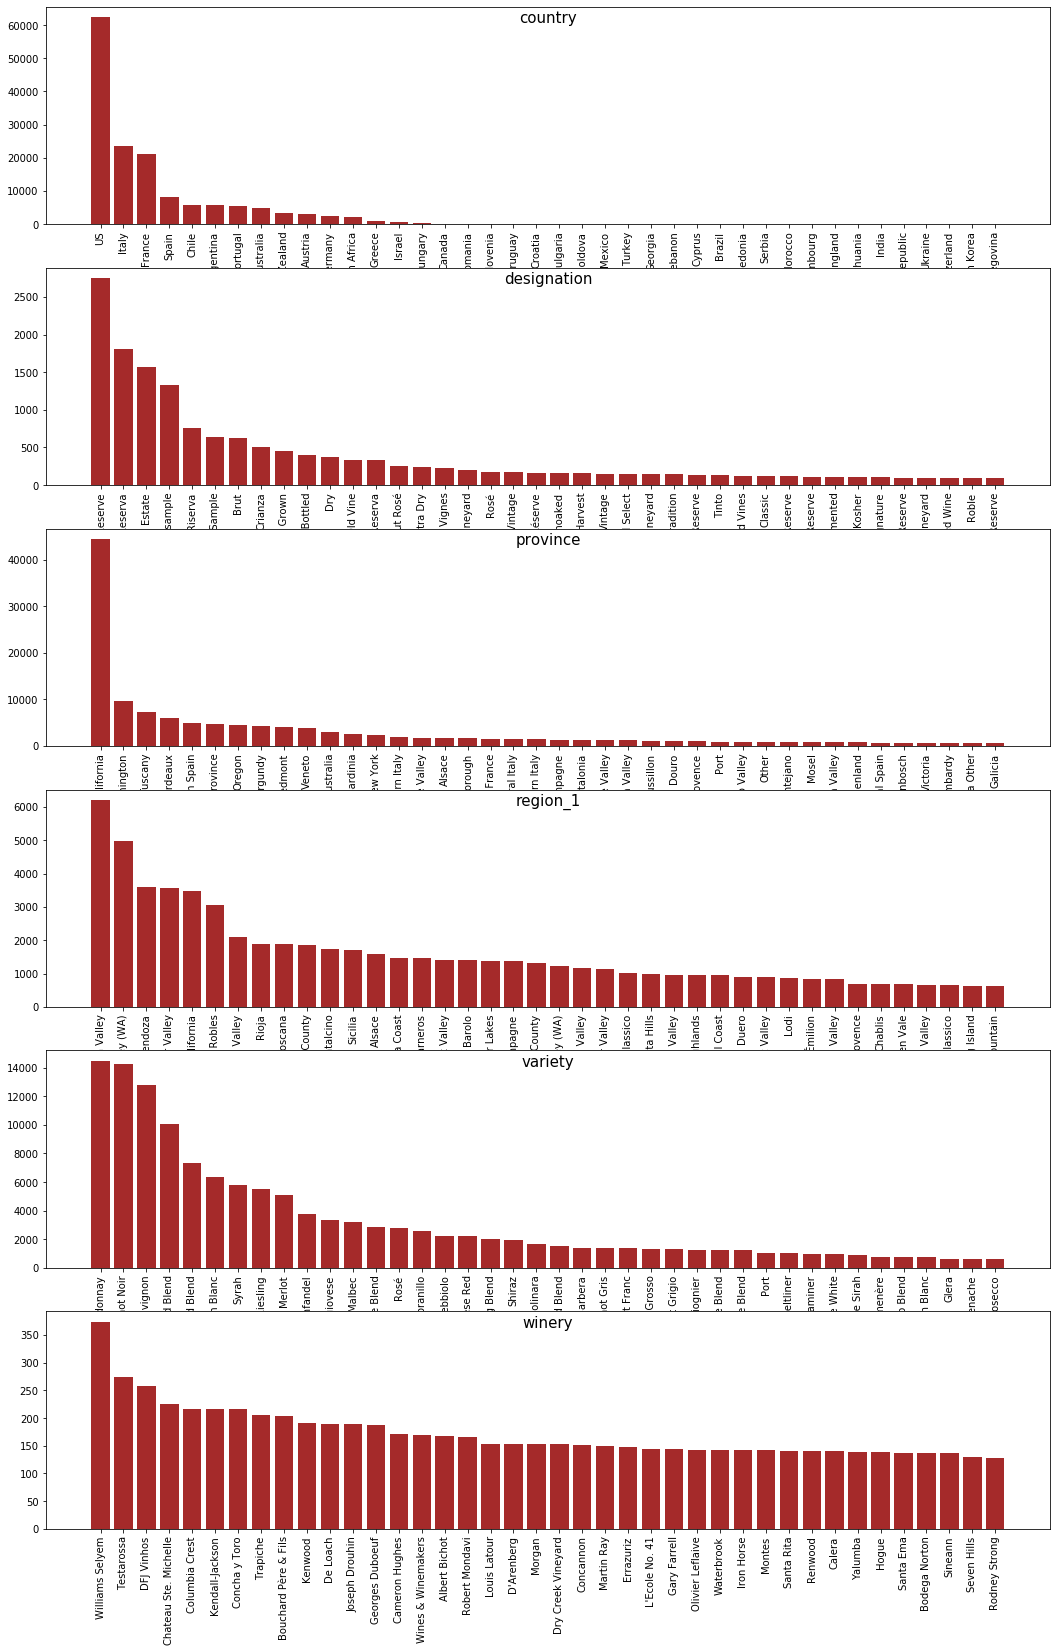

In [195]:
# 标称型数据频数
def NomFeaFreqs(data,data_contrast=None):
    plt.figure(figsize=(18,28))
    i = 1
    # 获取属性中各数值的频次
    def getFreqList(data,nom_feature_name):
        
        # dict将Series数据类型转化为dict数据类型
        freqs = dict(data[nom_feature_name].value_counts())
        
        # 如果数量过多，只保留频次数最高的max40个
        max = 40
        if len(freqs) > max:
            freqs = [list(freqs.keys())[:max],list(freqs.values())[:max]]
        else:
            freqs = [freqs.keys(),freqs.values()]
        return freqs
    
    # 绘图
    for nom_feature_name in nom_features:
        if data_contrast is None:
            freqs = getFreqList(data,nom_feature_name)
            plt.subplot(6,1,i)
            i = i+1
            plt.bar(freqs[0],freqs[1],color='brown')
            plt.xticks(rotation=90)
            plt.title(nom_feature_name,y=0.9,fontdict={'weight':'normal','size': 15})
        else:
            freqs1 = getFreqList(data,nom_feature_name)
            freqs2 = getFreqList(data_contrast,nom_feature_name)
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs1[0],freqs1[1],color='brown')
            plt.xticks(rotation=90)
            plt.title(nom_feature_name,y=0.9,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs2[0],freqs2[1],color='green')
            plt.xticks(rotation=90)
            plt.title(nom_feature_name,y=0.9,fontdict={'weight':'normal','size': 15})
NomFeaFreqs(data)

#### 3.2.2 数值型数据频数可视化

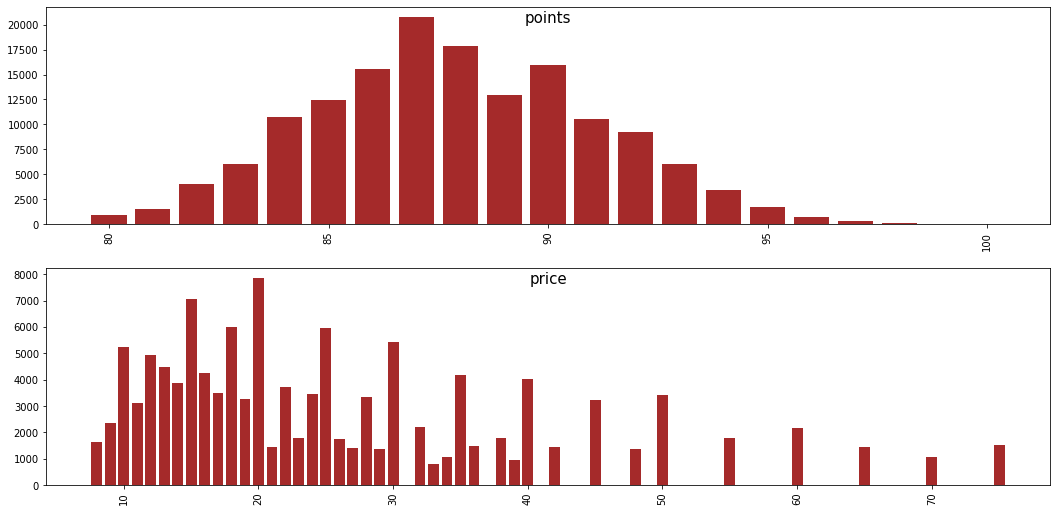

In [190]:
# 数值型数据频数
def NumFeaFreqs(data,data_contrast=None):
    plt.figure(figsize=(18,28))
    i = 1
    # 获取属性中各数值的频次
    def getFreqList(data,num_feature_name):
        
        # dict将Series数据类型转化为dict数据类型
        freqs = dict(data[num_feature_name].value_counts())
        
        # 如果数量过多，只保留频次数最高的max40个
        max = 40
        if len(freqs) > max:
            freqs = [list(freqs.keys())[:max],list(freqs.values())[:max]]
        else:
            freqs = [freqs.keys(),freqs.values()]
        return freqs
    
    # 绘图
    for num_feature_name in num_features:
        if data_contrast is None:
            freqs = getFreqList(data,num_feature_name)
            plt.subplot(6,1,i)
            i = i+1
            plt.bar(freqs[0],freqs[1],color='brown')
            plt.xticks(rotation=90)
            plt.title(num_feature_name,y=0.9,fontdict={'weight':'normal','size': 15})
        else:
            freqs1 = getFreqList(data,num_fea_name)
            freqs2 = getFreqList(data_contrast,num_fea_name)
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs1[0],freqs1[1])
            plt.xticks(rotation=90)
            plt.title(num_fea_name,y=0.9,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(6,2,i)
            i = i+1
            plt.bar(freqs2[0],freqs2[1],color='green')
            plt.xticks(rotation=90)
            plt.title(num_fea_name,y=0.9,fontdict={'weight':'normal','size': 15})
NumFeaFreqs(data)

## 3.3 五数分析、缺失值个数分析

**因为五数分析仅涉及数值型数据，所以本部分分析仅针对数值型数据**

#### 3.3.1 五数分析

In [158]:
for num_fea_name in num_features:
    description = data[num_fea_name].describe()
    print("%s的五数分析如下：\n"%(num_fea_name),description)

points的五数分析如下：
 count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
price的五数分析如下：
 count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


#### 3.3.2 缺失值个数分析

In [159]:
for num_fea_name in num_features: 
    null_num = data[num_fea_name].isnull().sum()
    print("%s中为null的数据数量有：%d"%(num_fea_name,null_num))

points中为null的数据数量有：0
price中为null的数据数量有：13695


## 3.4 数据可视化

**本部分数据可视化仅针对数值型数据：包含直方图、盒图、分布图**

### 3.4.1直方图

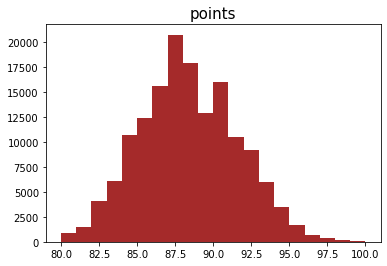

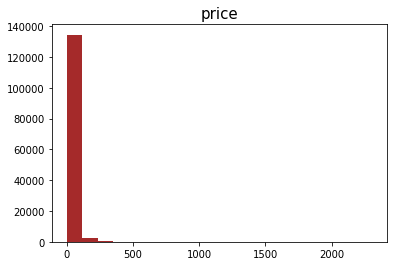

In [191]:
# 绘制数值型属性的直方图
def drawNumFeaHist(data,data_contrast=None):
    if data_contrast is None:
        for num_fea_name in num_features:
            plt.hist(list(data[num_fea_name].dropna(axis=0)),bins=20,color='brown')
            plt.title(num_fea_name,fontdict={'weight':'normal','size': 15})
            plt.show()
    else:
        plt.figure(figsize=(15,10))
        i = 1
        for num_fea_name in num_features:
            plt.subplot(2,2,i)
            i = i+1
            plt.hist(list(data[num_fea_name].dropna(axis=0)),bins=20,color='brown')
            plt.title(num_fea_name,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(2,2,i)
            i = i+1
            plt.hist(list(data_contrast[num_fea_name].dropna(axis=0)),bins=20,color='green')
            plt.title(num_fea_name,fontdict={'weight':'normal','size': 15})
        pass
    pass
drawNumFeaHist(data)

### 3.4.2 盒图

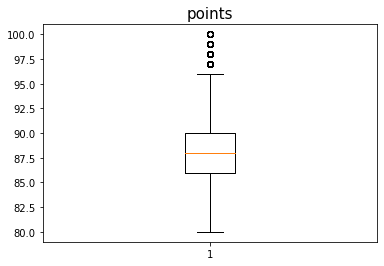

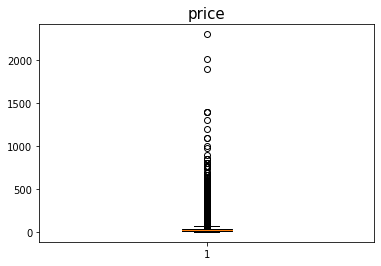

In [170]:
# 绘制数值型属性的盒图
def drawNumFeatBoxPlot(data,data_contrast=None):
    if data_contrast is None:
        for numfeatname in num_features:
            plt.boxplot(list(data[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            plt.show()
    else:
        plt.figure(figsize=(15,10))
        i = 1
        
        for numfeatname in num_features:
            plt.subplot(2,2,i)
            i = i+1
            plt.boxplot(list(data[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
            
            plt.subplot(2,2,i)
            i = i+1
            plt.boxplot(list(data_contrast[numfeatname].dropna(axis=0)))
            plt.title(numfeatname,fontdict={'weight':'normal','size': 15})
        plt.show()
        pass
    pass
    
drawNumFeatBoxPlot(data_src)

**可以看到points主要集中在80到96分之间   
价格主要集中在1000元以下**

### 3.4.3 分布图

/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/guopeiqi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

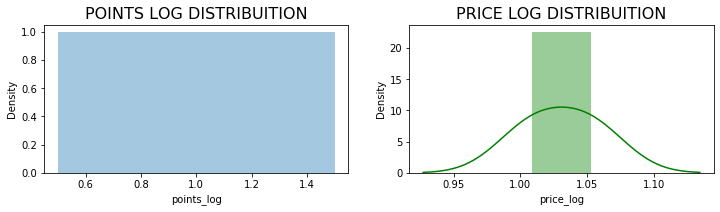

In [94]:
# 绘制正态分布图
def logDistribution(data):
    log_data = pd.DataFrame(['points_log','price_log'])
    log_data['points_log'] = np.log(data['points'] + 1)
    log_data['price_log'] = np.log(data['price'] + 1)
    plt.figure(figsize = (12,6))

    plt.subplot(221)
    g1 = sns.distplot(log_data['points_log'])
    g1.set_title("POINTS LOG DISTRIBUITION", fontsize=16)

    plt.subplot(222)
    g2 = sns.distplot(log_data['price_log'],color='green')
    g2.set_title('PRICE LOG DISTRIBUITION', fontsize=16)

    plt.show()
logDistribution(data)

## 4.缺失值处理

## 4.1 缺失值分析

In [162]:
# 数据中各属性的空值个数
data.isnull().sum()

country            5
designation    45735
points             0
price          13695
province           5
region_1       25060
variety            0
winery             0
dtype: int64

**可以发现   
country：有5个为空，不清楚产国   
designation：45735个为空，不知道名称   
prince：13695个为空，不知道价格   
province：5个为空，不知道省份   
region_1：25060，不知道具体区域**

## 4.2 四种方法处理缺失值

### 4.2.1 直接剔除缺失值

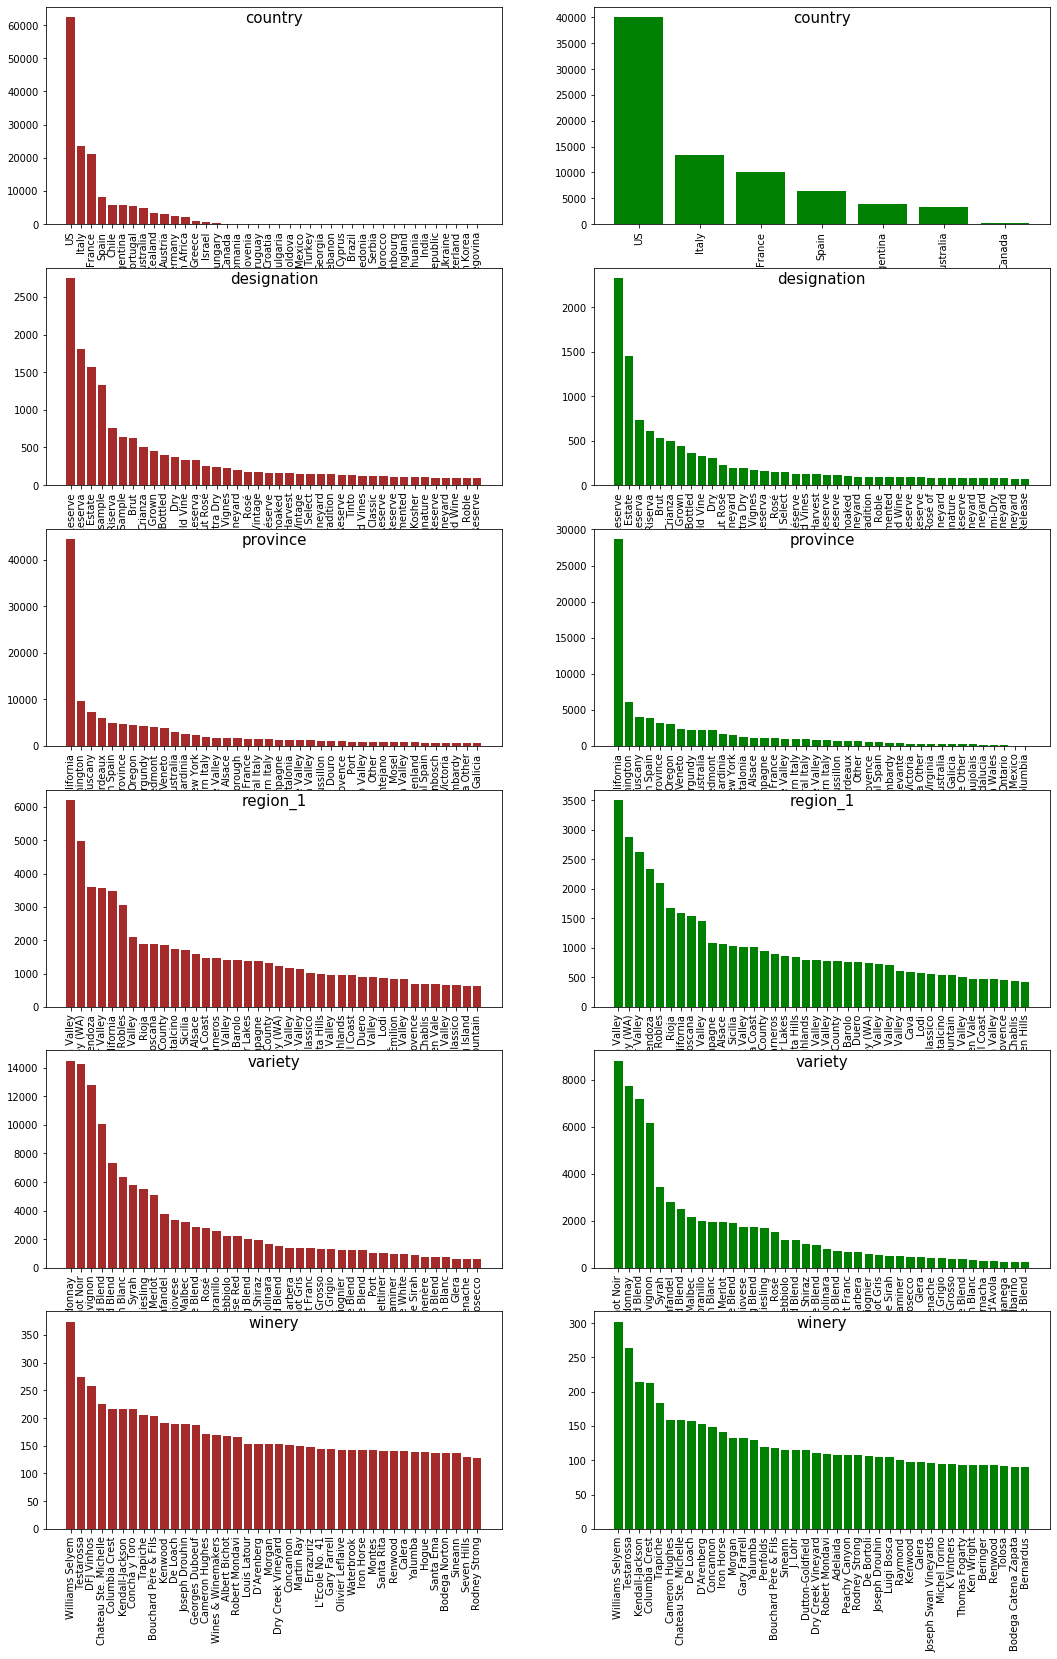

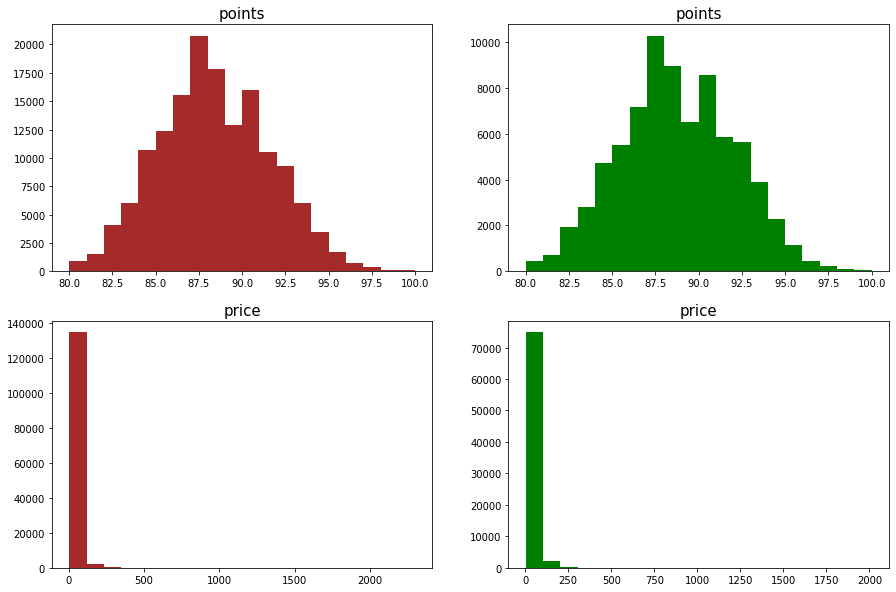

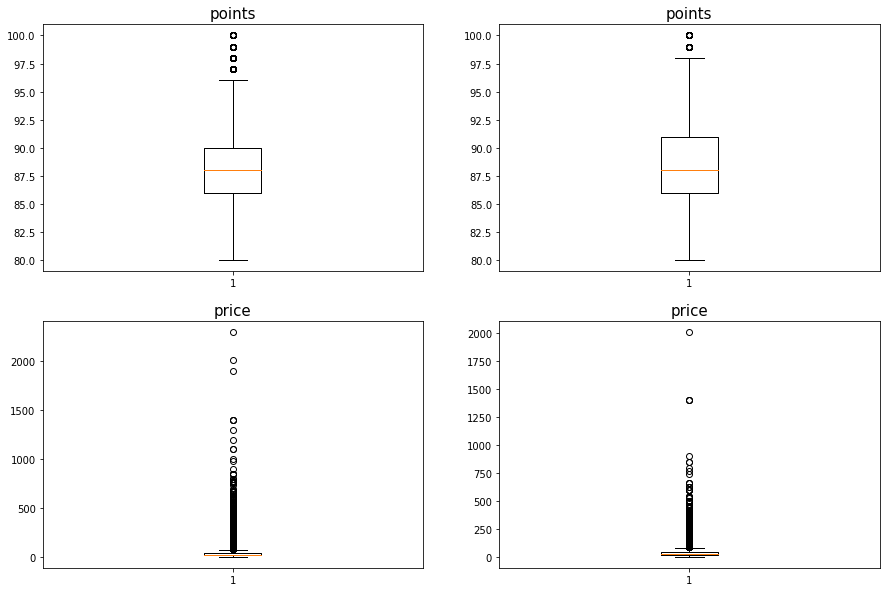

In [196]:
# 剔除缺失部分
data_dropnull = data.dropna(axis=0)

# 可视化数据
NomFeaFreqs(data,data_dropnull)
drawNumFeaHist(data,data_dropnull)
drawNumFeatBoxPlot(data,data_dropnull)

**如果直接剔除缺失部分后：   
country：仅保留下剩下7个具有完善数据的国家   
从price和points：对于价格很低或很高的酒、品质低或很高的酒，信息收集均不完善。**

### 4.2.2 最高频率值填补缺失值

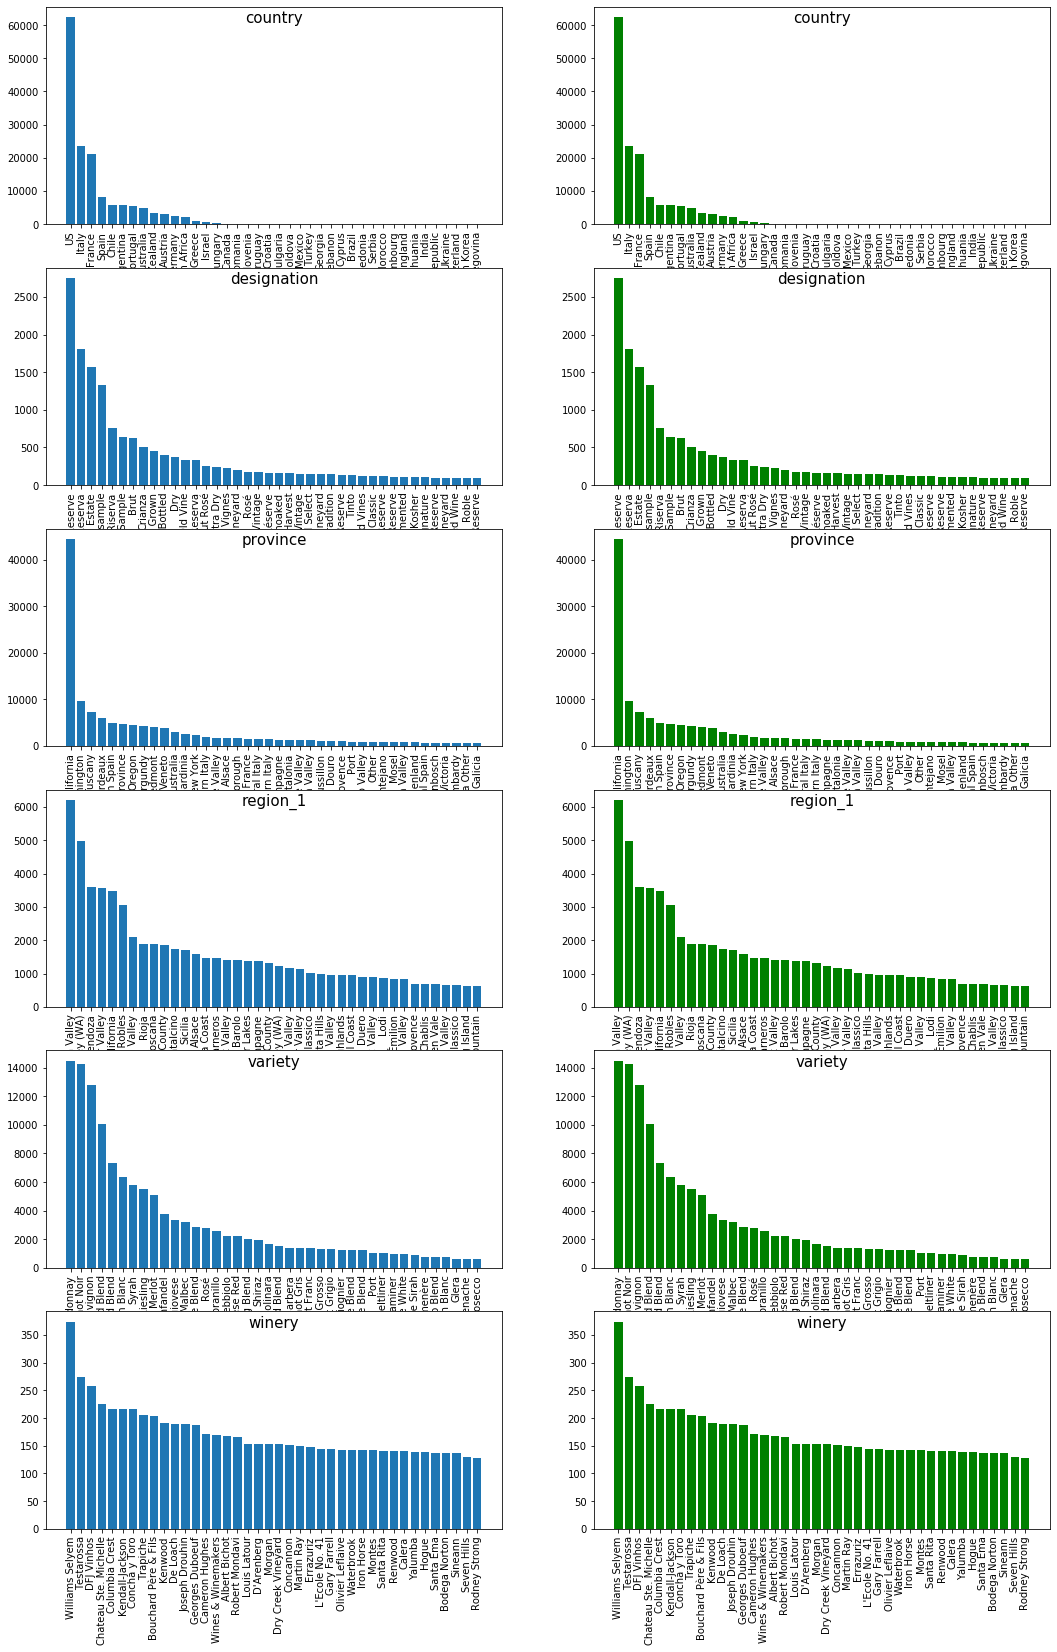

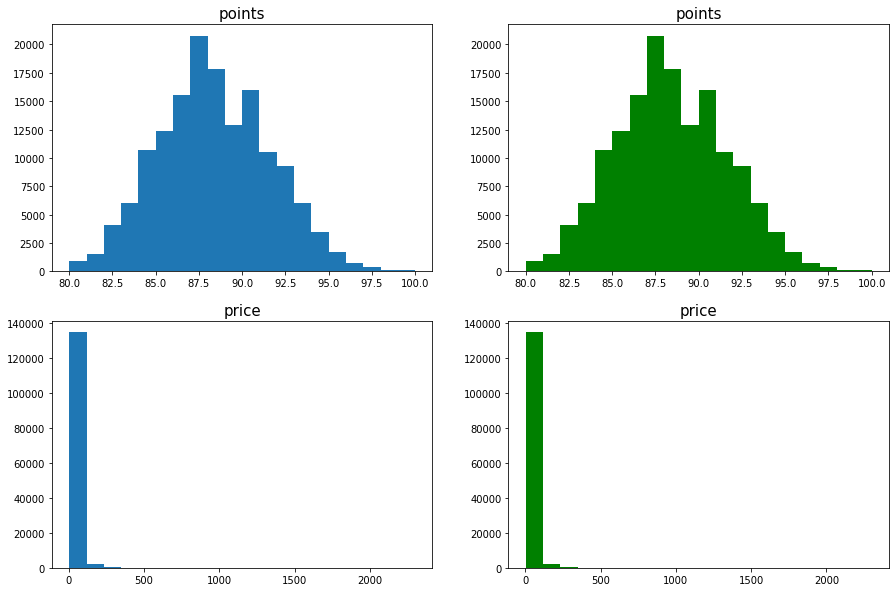

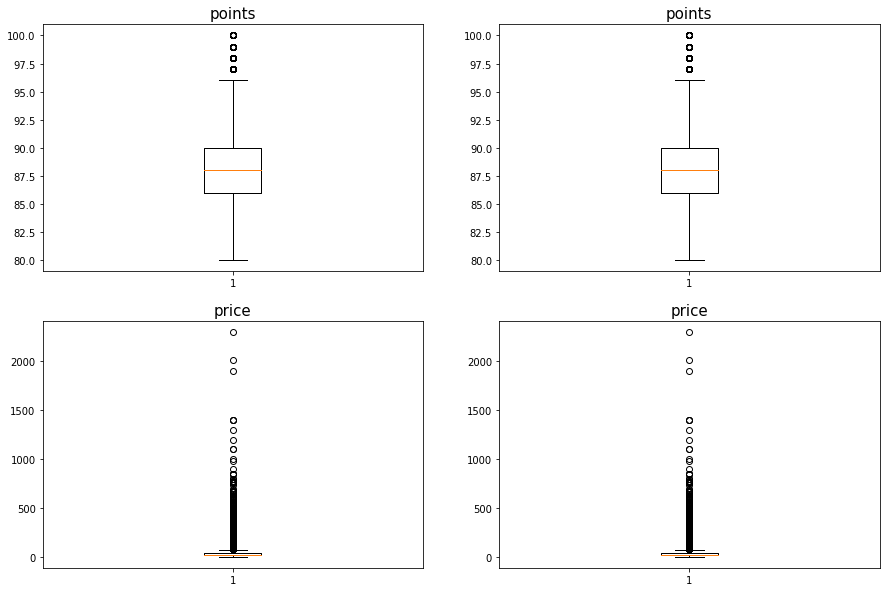

In [185]:
data_mode = data_src.copy()
data_mode = data_mode.fillna(data_mode.mode()) #使用众数
# 可视化数据
NomFeaFreqs(data,data_mode)
drawNumFeaHist(data,data_mode)
drawNumFeatBoxPlot(data,data_mode)

In [181]:
print(data.mode())

  country designation  points  price    province     region_1     variety  \
0      US     Reserve      87   20.0  California  Napa Valley  Chardonnay   

            winery  
0  Williams Selyem  


### 4.2.3 通过属性的相关关系来填补缺失值

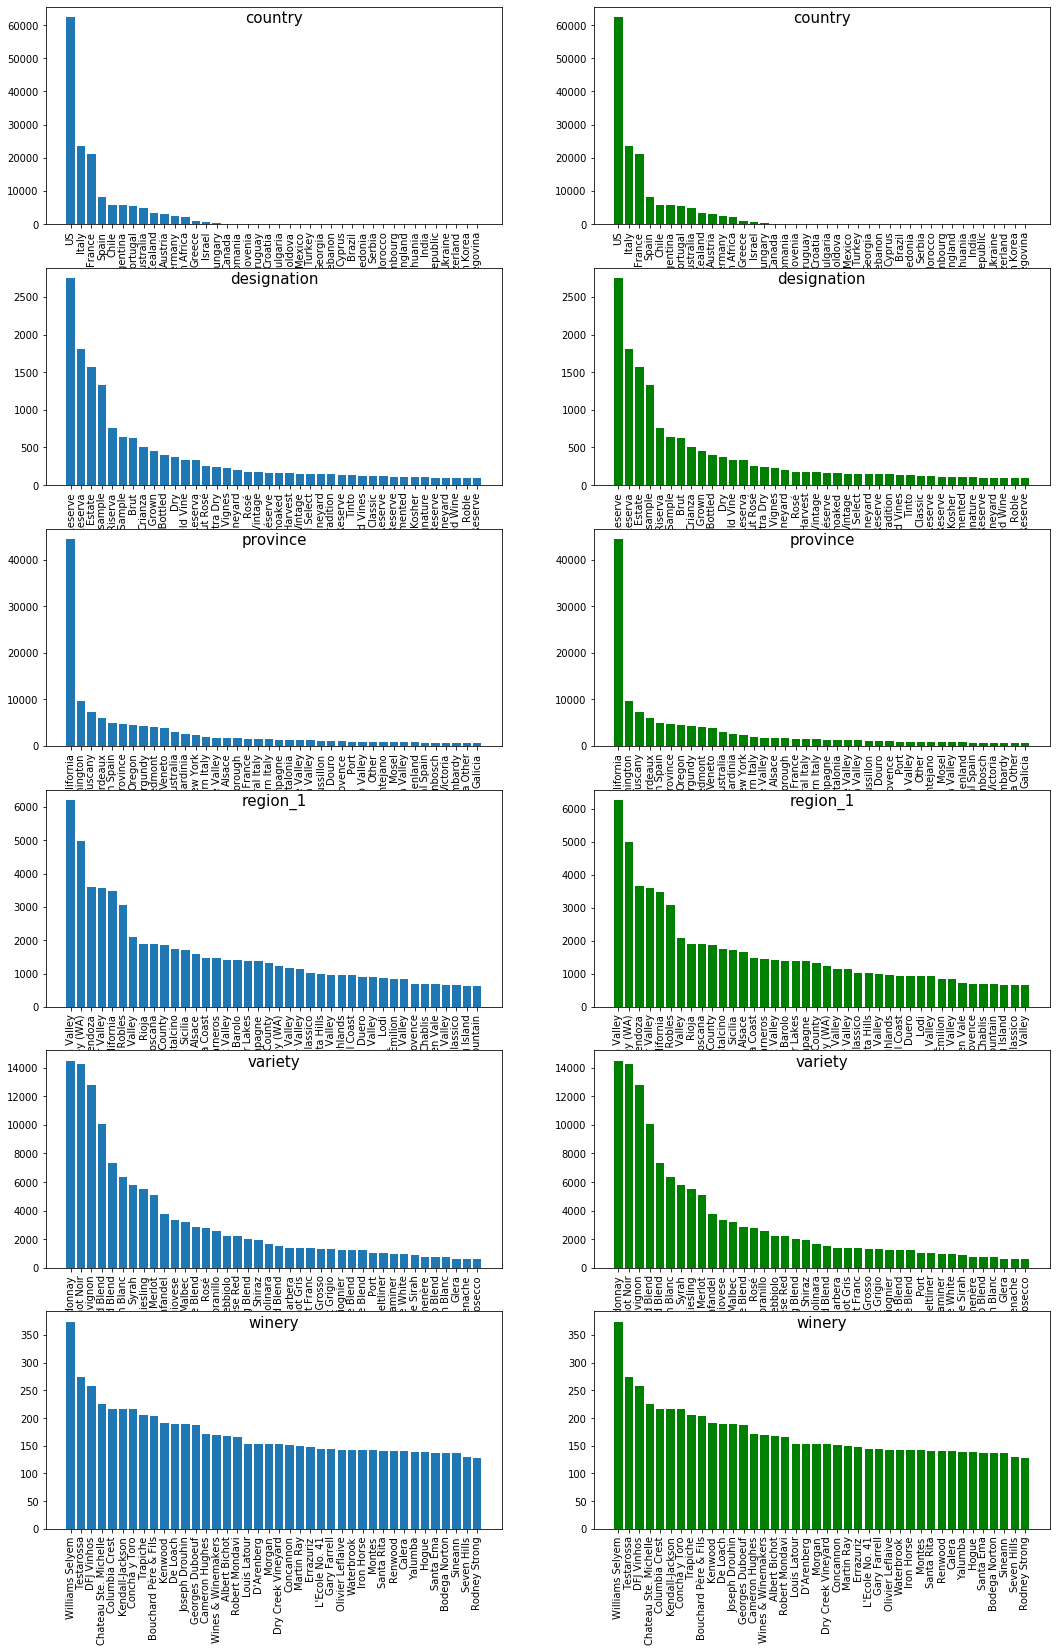

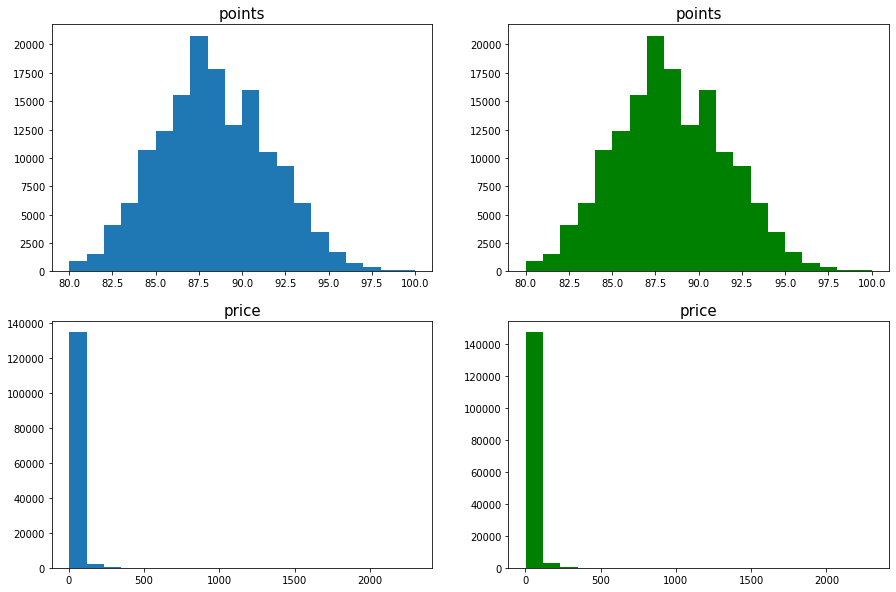

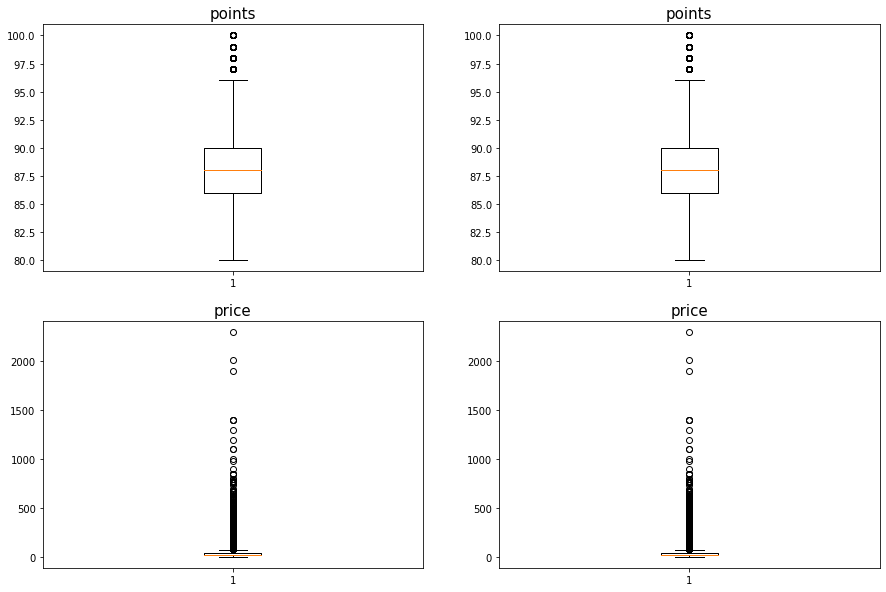

In [187]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# 通过属性的相关关系来填补缺失值
def fillna_rfr(data,predfeatname):
    # 用'NULL'(标称型属性)或-100(数值型属性)作为取值来填充非预测属性的缺失值
    data_filled = data.copy()
    for featname in data_filled.columns:
        if featname == predfeatname:
            continue
        if featname in num_features:
            data_filled[featname].fillna(-100,inplace=True)
        else:
            data_filled[featname].fillna('NULL',inplace=True)
        pass
    
    # 属性编码
    encx=preprocessing.OrdinalEncoder()
    encx.fit(data_filled.drop([predfeatname],axis=1))
    ency=preprocessing.OrdinalEncoder()
    ency.fit(data_filled[predfeatname].dropna(axis=0).values.reshape(-1,1))
    
    # 分割训练数据和预测数据
    data_train = data_filled[data_filled[predfeatname].notna()]
    data_pred = data_filled[data_filled[predfeatname].isna()]
    data_train_x = data_train.drop([predfeatname],axis=1)
    data_train_y = data_train[predfeatname]
    data_pred_x = data_pred.drop([predfeatname],axis=1)
    
    # 用RandomForestRegressor预测缺失值
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
    rfr.fit(encx.transform(data_train_x),ency.transform(data_train_y.values.reshape(-1,1)).ravel())
    pred_y = rfr.predict(encx.transform(data_pred_x))
    data_pred_y = ency.inverse_transform(pred_y.reshape(-1,1))
    
    # 用预测的缺失值进行填充
    nanidxs = data_filled[data_filled.isna().values==True].index.values
    predidx = 0
    for idx in nanidxs:
        data.loc[idx,predfeatname] = data_pred_y[predidx][0]
        predidx = predidx+1
    pass

data_fill_rfr = data_src.copy()
fillna_rfr(data_fill_rfr,'price')
fillna_rfr(data_fill_rfr,'country')
fillna_rfr(data_fill_rfr,'designation')
fillna_rfr(data_fill_rfr,'province')
fillna_rfr(data_fill_rfr,'region_1')

# 可视化数据
NomFeaFreqs(data,data_fill_rfr)
drawNumFeaHist(data,data_fill_rfr)
drawNumFeatBoxPlot(data,data_fill_rfr)

**可以观察出数据分布未发生明显改变，说明该方法适用**

### 4.2.4 通过数据对象之间的相似性来填补缺失值

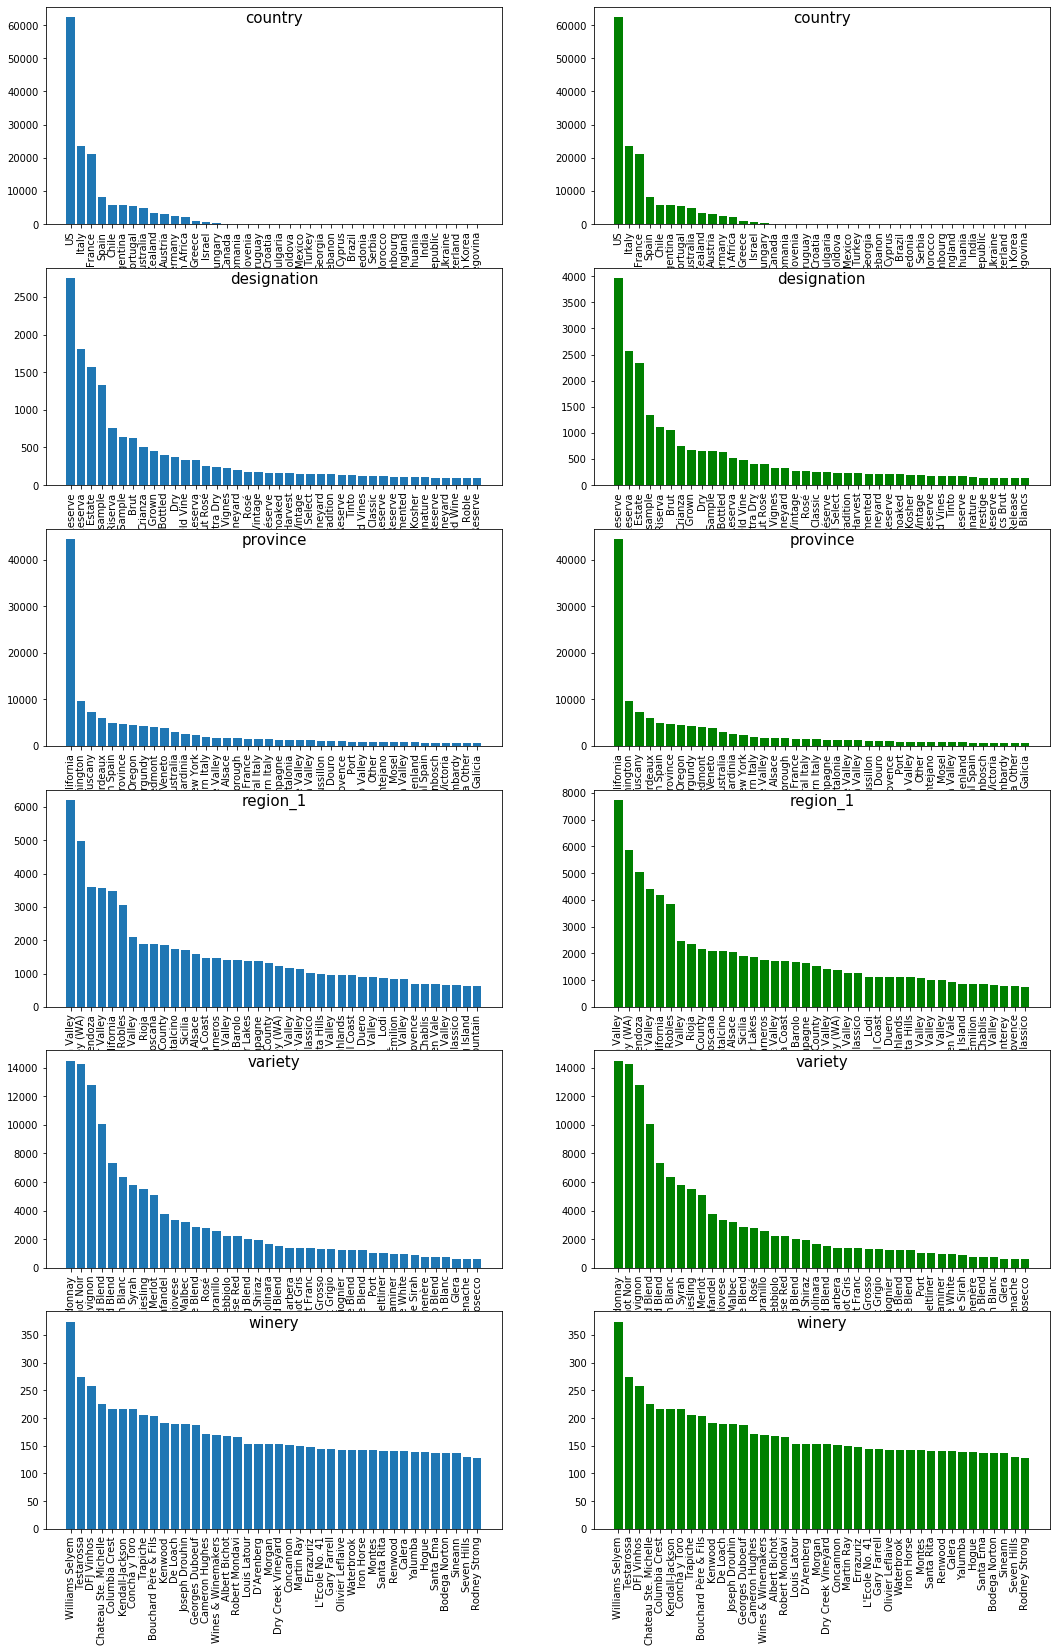

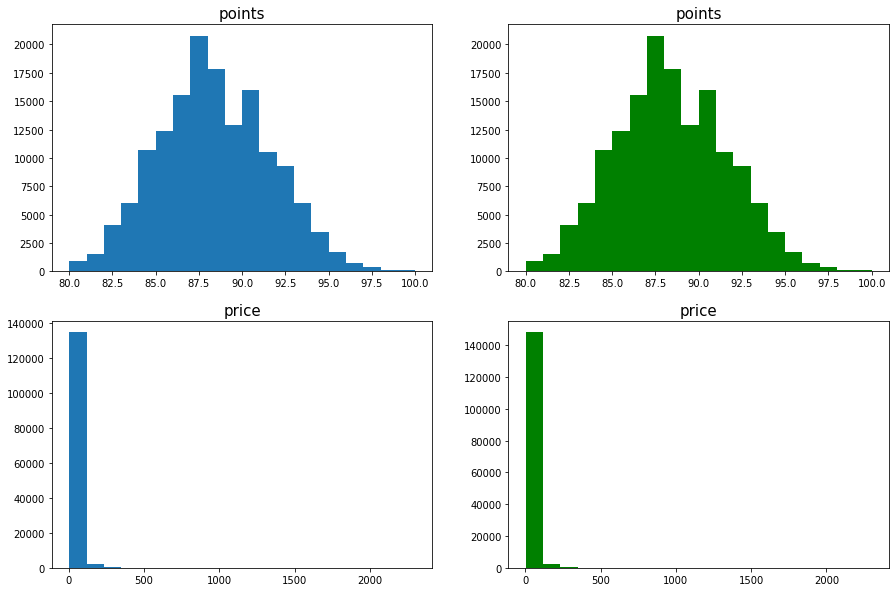

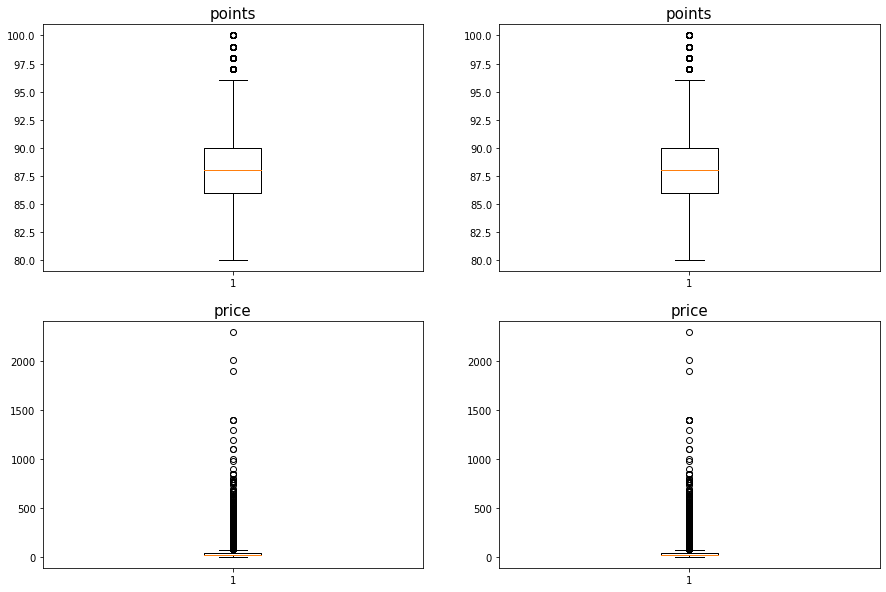

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# 通过数据对象之间的相似性来填补缺失值
def fillna_knn(data,predfeatname):
    # 用'NULL'(标称型属性)或-100(数值型属性)作为取值来填充非预测属性的缺失值
    data_filled = data.copy()
    for featname in data_filled.columns:
        if featname == predfeatname:
            continue
        if featname in num_features:
            data_filled[featname].fillna(-100,inplace=True)
        else:
            data_filled[featname].fillna('NULL',inplace=True)
        pass
    
    # 属性编码
    encx=preprocessing.OrdinalEncoder()
    encx.fit(data_filled.drop([predfeatname],axis=1))
    ency=preprocessing.OrdinalEncoder()
    ency.fit(data_filled[predfeatname].dropna(axis=0).values.reshape(-1,1))
    
    # 分割训练数据和预测数据
    data_train = data_filled[data_filled[predfeatname].notna()]
    data_pred = data_filled[data_filled[predfeatname].isna()]
    data_train_x = data_train.drop([predfeatname],axis=1)
    data_train_y = data_train[predfeatname]
    data_pred_x = data_pred.drop([predfeatname],axis=1)
    
    # 用KNN预测缺失值
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                               metric_params=None, n_jobs=1, n_neighbors=5, p=2, 
                               weights='uniform')
    knn.fit(encx.transform(data_train_x),ency.transform(data_train_y.values.reshape(-1,1)).ravel())
    pred_y = knn.predict(encx.transform(data_pred_x))
    data_pred_y = ency.inverse_transform(pred_y.reshape(-1,1))
    
    # 用预测的缺失值进行填充
    nanidxs = data_filled[data_filled.isna().values==True].index.values
    predidx = 0
    for idx in nanidxs:
        data.loc[idx,predfeatname] = data_pred_y[predidx][0]
        predidx = predidx+1
    pass

data_fill_knn = data_src.copy()
fillna_knn(data_fill_knn,'price')
fillna_knn(data_fill_knn,'country')
fillna_knn(data_fill_knn,'designation')
fillna_knn(data_fill_knn,'province')
fillna_knn(data_fill_knn,'region_1')

# 可视化数据
NomFeaFreqs(data,data_fill_knn)
drawNumFeaHist(data,data_fill_knn)
drawNumFeatBoxPlot(data,data_fill_knn)

**可以发现数据分布没有发生明显改变，该方法适用**